## TRABAJO FINAL METODOLOGÍA DE LA OPINIÓN PÚBLICA

### "Análisis de resultados en las elecciones generales 2023 para CABA"


#### Grupo: Matías Chiampan, Nicolas Faccini, Camila Valeff

El objetivo del siguiente trabajo consistió en examinar los resultados electorales en la instancia de elecciones generales dentro de CABA. 
Para ello se utilizó Python y diferentes librerias importadas con el fin de robustecer la capacidad de análisis, incorporando diversidad de gráficas. 

## Tablas e instalaciones

In [ ]:
pip install contextily

In [ ]:
pip install geopandas

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from bokeh.models import GeoJSONDataSource
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import plotly.express as px
df_resultados = pd.read_csv('2023_Generales\ResultadosElectorales_2023.csv')
df_caba = pd.read_csv('2023_Generales\CABA-circuitos-electorales.csv')
df_ambitos = pd.read_csv('2023_Generales/Ambitos_Generales_2023.csv')
df_colores = pd.read_csv('2023_Generales/Colores_2023.csv')
df_resultados = pd.read_csv('2023_Generales\ResultadosElectorales_2023.csv')
Cen_viviendas = pd.read_csv('censo2010/censo/vivienda.csv')
Cen_hogares = pd.read_csv('censo2010/censo/hogar.csv')
Cen_personas = pd.read_csv('censo2010/censo/persona.csv')
Cen_dpto = pd.read_csv('censo2010/censo/dpto.csv')
Cen_frac = pd.read_csv('censo2010/censo/frac.csv')
Cen_prov = pd.read_csv('censo2010/censo/prov.csv')
Cen_radio= pd.read_csv('censo2010/censo/radio.csv')
#merge para unificar personas-hogares

merge_persona_hogar = pd.merge(Cen_personas, Cen_hogares[['HOGAR_REF_ID', 'ALGUNBI', 'VIVIENDA_REF_ID']], on='HOGAR_REF_ID', how='left')

#merge para unificar el combinado anterior con viviendas

merge_total = pd.merge(merge_persona_hogar, Cen_viviendas[['VIVIENDA_REF_ID', 'MUNI', 'LOCAL']], on='VIVIENDA_REF_ID', how='left')

#total base censo por persona, filtrado por las comunas que pertenecen a CABA.
censo_caba = merge_total[(merge_total['MUNI'] >= 20010001) & (merge_total['MUNI'] <= 20150001)]

censo_caba

#hacemos un replace para que los valores de id local coincidan con los ids de comuna en la base de elecciones (representan lo mismo)
nuevos_codigos = {2001010:1,
2002010:2,
2003010:3,
2004010:4,
2005010:5,
2006010:6,
2007010:7,
2008010:8,
2009010:9,
2010010:10,
2011010:11,
2012010:12,
2013010:13,
2014010:14,
2015010:15
}

censo_caba['LOCAL'] = censo_caba['LOCAL'].replace(nuevos_codigos)
CANT_personas_nbiP = censo_caba[censo_caba['ALGUNBI'] == 1].groupby('LOCAL')['PERSONA_REF_ID'].count().sort_values(ascending=False).reset_index(name='conteo_ALGUNBI')
pd.DataFrame(CANT_personas_nbiP)
CANT_personas_nbiP['P_de_poblacion_total_con_algun_NBI'] = ((CANT_personas_nbiP['conteo_ALGUNBI'] / CANT_personas_nbiP['conteo_ALGUNBI'].sum()) * 100).round(1).astype(str) + '%'
poblacion_por_comuna = censo_caba.groupby('LOCAL')['PERSONA_REF_ID'].count().reset_index(name='Poblacion_de_comuna')
CANT_personas_nbiP = pd.merge(CANT_personas_nbiP, poblacion_por_comuna, on='LOCAL')
CANT_personas_nbiP['P_segun_poblacion_de_comuna'] = ((CANT_personas_nbiP['conteo_ALGUNBI'] / CANT_personas_nbiP['Poblacion_de_comuna']) * 100).round(1)
Total_NBI_caba = CANT_personas_nbiP['conteo_ALGUNBI'].sum()
pd.DataFrame(CANT_personas_nbiP)
CANT_personas_ES = censo_caba[censo_caba['P09'].isin([5,6,7,8])].groupby('LOCAL')['PERSONA_REF_ID'].count().sort_values(ascending=False).reset_index(name='conteo_personas_secundario')
pd.DataFrame(CANT_personas_ES)
CANT_personas_ES['Porcentaje que representa de la población total'] = ((CANT_personas_ES['conteo_personas_secundario'] / CANT_personas_ES['conteo_personas_secundario'].sum()) * 100).round(1).astype(str) + '%'
poblacion_por_comuna = censo_caba.groupby('LOCAL')['PERSONA_REF_ID'].count().reset_index(name='Población de comuna')
poblacion_por_comuna_m18 = censo_caba[censo_caba['P03'] >= 18].groupby('LOCAL')['PERSONA_REF_ID'].count().reset_index(name='Población de comuna_m18')
merged_df = pd.merge(CANT_personas_ES, poblacion_por_comuna, on='LOCAL')
CANT_personas_ES = pd.merge(merged_df, poblacion_por_comuna_m18, on='LOCAL')
CANT_personas_ES['P_segun_poblacion_de_comuna'] = ((CANT_personas_ES['conteo_personas_secundario'] / CANT_personas_ES['Población de comuna_m18']) * 100).round(1)
CANT_personas_ES.sort_values(by='P_segun_poblacion_de_comuna', ascending=False)
df_resultados_caba = df_resultados[df_resultados['distrito_id'] == 1]
cant_votos_total_caba = df_resultados_caba['votos_cantidad'].sum()
df_resultados_caba['seccion_id'] = df_resultados_caba['seccion_id'].astype(int) #forzamos el formato int para que el id se reconozca como número entero
df_caba['COMUNA'] = df_caba['COMUNA'].astype(int) #forzamos el formato int para que el id se reconozca como número entero
df_resultadosCaba = df_resultados[(df_resultados['distrito_id'] == 1) & 
                                  (df_resultados['cargo_nombre'] == "PRESIDENTE Y VICE")]

df_resultadosCaba = df_resultadosCaba[['seccion_id', 'circuito_id', 
                                       'mesa_id', 'agrupacion_nombre', 
                                       'votos_cantidad']]

df_resultadosCaba.reset_index(drop=True, inplace=True)
df_resultados_agrupado = df_resultadosCaba.groupby(['seccion_id', 'agrupacion_nombre'], as_index=False)['votos_cantidad'].sum()

df_resultados_agrupado = df_resultadosCaba.groupby(['seccion_id', 'agrupacion_nombre'], as_index=False)['votos_cantidad'].sum()
df_resultados_agrupado
idx_max_votos = df_resultados_agrupado.groupby('seccion_id')['votos_cantidad'].idxmax()
df_ganadores_seccion = df_resultados_agrupado.loc[idx_max_votos]

Df Combinado y DF analysis

In [63]:
df_resultados_caba['seccion_id'] = df_resultados_caba['seccion_id'].astype(int)
df_caba['COMUNA'] = df_caba['COMUNA'].astype(int)
df_combinado = pd.merge(df_resultados_caba, df_caba, left_on='seccion_id', right_on='COMUNA', how='left')
df_combinado.head().T


df_presidente = df_combinado[df_combinado['cargo_nombre'] == 'PRESIDENTE Y VICE']
nuevo_df = df_presidente[['mesa_id', 'cargo_nombre', 'circuito_id','votos_cantidad', 'COMUNA', 'agrupacion_id', 'agrupacion_nombre']]
df_analisis = nuevo_df.drop_duplicates()
df_analisis = df_analisis.reset_index(drop=True)
df_analisis.head()

,mesa_id,cargo_nombre,circuito_id,votos_cantidad,COMUNA,agrupacion_id,agrupacion_nombre
0,474,PRESIDENTE Y VICE,00018,0,1,0,NaN
1,475,PRESIDENTE Y VICE,00018,95,1,134,UNION POR LA PATRIA
2,475,PRESIDENTE Y VICE,00018,59,1,132,JUNTOS POR EL CAMBIO
3,475,PRESIDENTE Y VICE,00018,57,1,135,LA LIBERTAD AVANZA
4,475,PRESIDENTE Y VICE,00018,9,1,136,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD


Resultados caba2 y caba3

In [59]:
df_caba.head(4)
df_caba.groupby('COMUNA')['TOTAL'].sum().reset_index(name='Votantes totales')
df_caba2 = pd.DataFrame(df_caba.groupby('COMUNA')['TOTAL'].sum().reset_index(name='Votantes totales'))

df_resultadosCaba3 = df_resultados[(df_resultados['distrito_id'] == 1)]
df_resultadosCaba3 = df_resultadosCaba3[['seccion_id', 'circuito_id', 
                                       'mesa_id', 'agrupacion_nombre', 
                                       'votos_cantidad']]
df_resultadosCaba3.reset_index(drop=True, inplace=True)


df_resultadosCaba3.groupby('seccion_id')['votos_cantidad'].sum().reset_index(name='Votos emitidos')
df_resultadosCaba2 =pd.DataFrame(df_resultadosCaba.groupby('seccion_id')['votos_cantidad'].sum().reset_index(name='Votos emitidos'))
df_resultadosCaba2 = pd.merge(df_caba2.set_index('COMUNA'), df_resultadosCaba2.set_index('seccion_id'), how='left', left_index=True, right_index=True)
df_resultadosCaba2.reset_index(inplace=True)
df_resultadosCaba2['Participacion_por_comuna'] = (df_resultadosCaba2['Votos emitidos'] / df_resultadosCaba2['Votantes totales'] *100).round(1).astype('float')

participacion_total_caba = (df_resultadosCaba2['Votos emitidos'].sum() / df_resultadosCaba2['Votantes totales'].sum() *100).round(1).astype('float')
print(f'Participación total en CABA: {participacion_total_caba}')
votantes_totales_caba = df_resultadosCaba2['Votantes totales'].sum()
print(f'Cantidad de votantes en CABA: {votantes_totales_caba}')


Participación total en CABA: 76.5
Cantidad de votantes en CABA: 2497035.0


## Datos electorales

### Participación electoral por comuna

Durante las elecciones generales de CABA en 2023 se registró una concurrencia del 76.5%, teniendo en cuenta que la totalidad del padrón es de 2.497.035 personas, participaron 1.911.431 personas en estos comicios.
Las comunas con mayor participación electoral fueron las Comunas 12, 6 y 8, y las de menor participación las Comunas 1,2 y 3

La distribución de los votos para las elecciones a presidente y vice presidente de distirbuyeron de la siguiente forma:


C:\Users\camiv\AppData\Local\Temp\ipykernel_20648\897956462.py:3: FutureWarning: The default value of numeric_only in aggfunc='mean' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  gdf5_dissolved = gdf5.dissolve(by='COMUNA', aggfunc='mean')


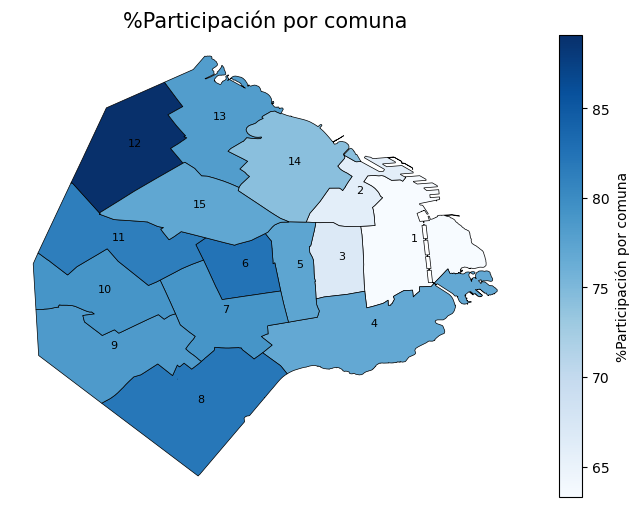

In [49]:
gdf5 = gpd.GeoDataFrame(df_caba, geometry=gpd.GeoSeries.from_wkt(df_caba['WKT']))
gdf5 = gdf5.join(df_resultadosCaba2.set_index('COMUNA'), on='COMUNA', how='left')
gdf5_dissolved = gdf5.dissolve(by='COMUNA', aggfunc='mean')
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf5_dissolved.plot(column='Participacion_por_comuna', ax=ax, legend=True,
                   legend_kwds={'label': "%Participación por comuna",
                                'orientation': "vertical"}, cmap='Blues', 
                   edgecolor='black', linewidth=0.5)
for x, y, label in zip(gdf5_dissolved.geometry.centroid.x, gdf5_dissolved.geometry.centroid.y, gdf5_dissolved.index):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, ha='center', va='center', color='black')
ax.set_title('%Participación por comuna', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.show()

La participación electoral por comuna, se distribuyó de la siguiente forma, siendo las comunas 12, 6 y 8 los distritos con mayor participación electoral en las generales de 2023

In [27]:
df_resultadosCaba2 = pd.DataFrame(df_resultadosCaba2.sort_values('Participacion_por_comuna', ascending=False))
df_resultadosCaba2

,COMUNA,Votantes totales,Votos emitidos,Participacion_por_comuna
11,12,170614.0,152072,89.1
5,6,151400.0,124701,82.4
7,8,133107.0,109192,82.0
10,11,166065.0,135206,81.4
6,7,169326.0,133889,79.1
9,10,144652.0,114417,79.1
8,9,145237.0,114065,78.5
12,13,210142.0,164311,78.2
4,5,152252.0,117662,77.3
14,15,161865.0,124840,77.1


Dentro de cada comuna, la distribución de los votos para los 3 principales partidos que compitieron en las elecciones (Union por la Patria, Juntos por el Cambio y La Libertad Avanza), fue la siguiente:

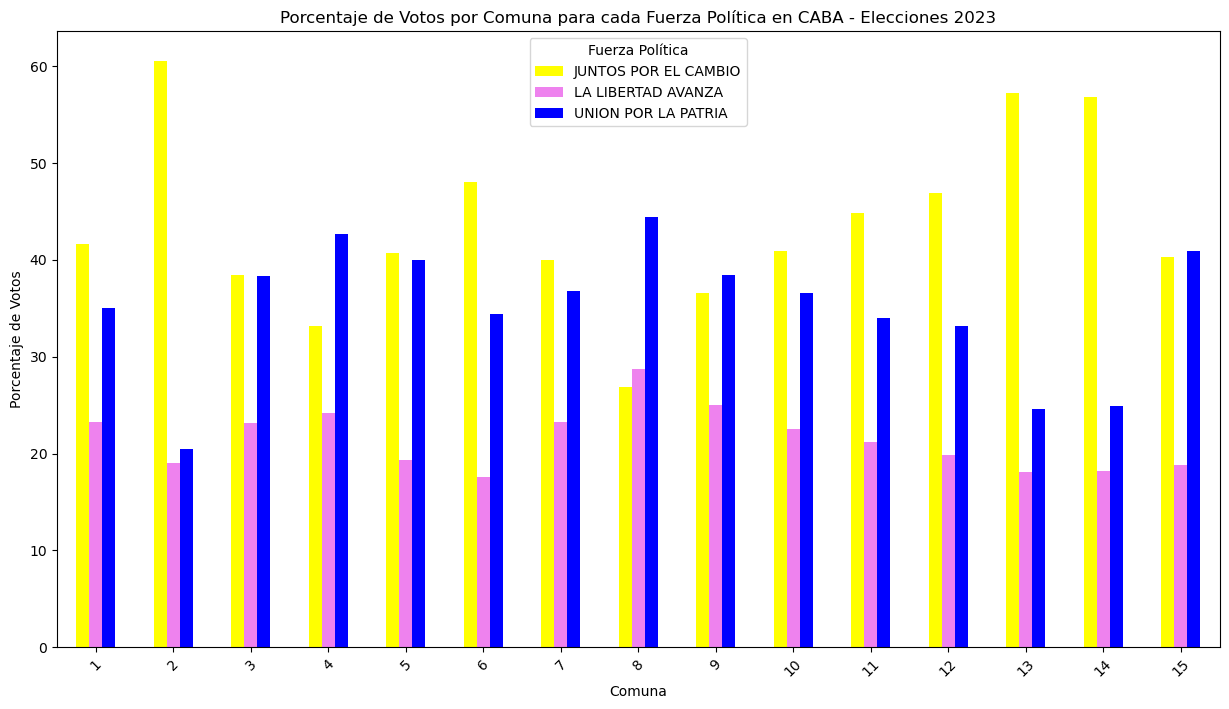

In [38]:
df_agrupado = df_resultadosCaba[df_resultadosCaba['agrupacion_nombre'].isin(["UNION POR LA PATRIA", "LA LIBERTAD AVANZA", "JUNTOS POR EL CAMBIO"])]
df_agrupado = df_agrupado.groupby(['seccion_id', 'agrupacion_nombre'])['votos_cantidad'].sum().unstack().fillna(0)

# Convertir los votos a porcentajes
df_agrupado_porcentual = df_agrupado.div(df_agrupado.sum(axis=1), axis=0) * 100

# Colores personalizados para cada fuerza política
colores = ["yellow", "violet", "blue"]

# Creación del gráfico de barras con colores específicos
df_agrupado_porcentual.plot(kind='bar', figsize=(15, 8), color=colores)

# Añadir títulos y etiquetas
plt.title('Porcentaje de Votos por Comuna para cada Fuerza Política en CABA - Elecciones 2023')
plt.xlabel('Comuna')
plt.ylabel('Porcentaje de Votos')
plt.xticks(rotation=45)
plt.legend(title='Fuerza Política')

# Mostrar el gráfico
plt.show()


Dentro de la siguiente tabla se pueden observar ordenado de mayor a menor la cantidad de votos de Juntos por el Cambio según % alcanzado en cada comuna.En la comuna 2, 13 y 14, Juntos por el Cambio alcanzó más de 50% de los votos.
Por su parte Unión por la Patria, alcanzó mayor cantidad de votos en las comunas 8 (44,5%),4 (42,7%) y 15 (40,9%). Y, contrariamente a JxC, su peor desempeño se vió en las comunas 2,13 y 14. 

La Libertad Avanza alcanzo un 29% de los votos como máximo en CABA. En la comuna 8 compitió con Unión por la Patria, siendo el distrito con mejor desempeño.

In [47]:
df_agrupado_porcentual = df_agrupado_porcentual.round(2)
df_agrupado_porcentual.sort_values('LA LIBERTAD AVANZA', ascending=False)


agrupacion_nombre,JUNTOS POR EL CAMBIO,LA LIBERTAD AVANZA,UNION POR LA PATRIA
seccion_id,,,
8,26.86,28.69,44.45
9,36.61,25.00,38.39
4,33.18,24.14,42.68
1,41.69,23.27,35.04
7,39.96,23.22,36.82
3,38.45,23.18,38.37
10,40.96,22.50,36.54
11,44.85,21.18,33.97
12,46.94,19.86,33.20


Para observar la distribución de los votos por agrupación política, realizamos mapas de calor que permitan revisar la concentración del votante según los candidatos. 


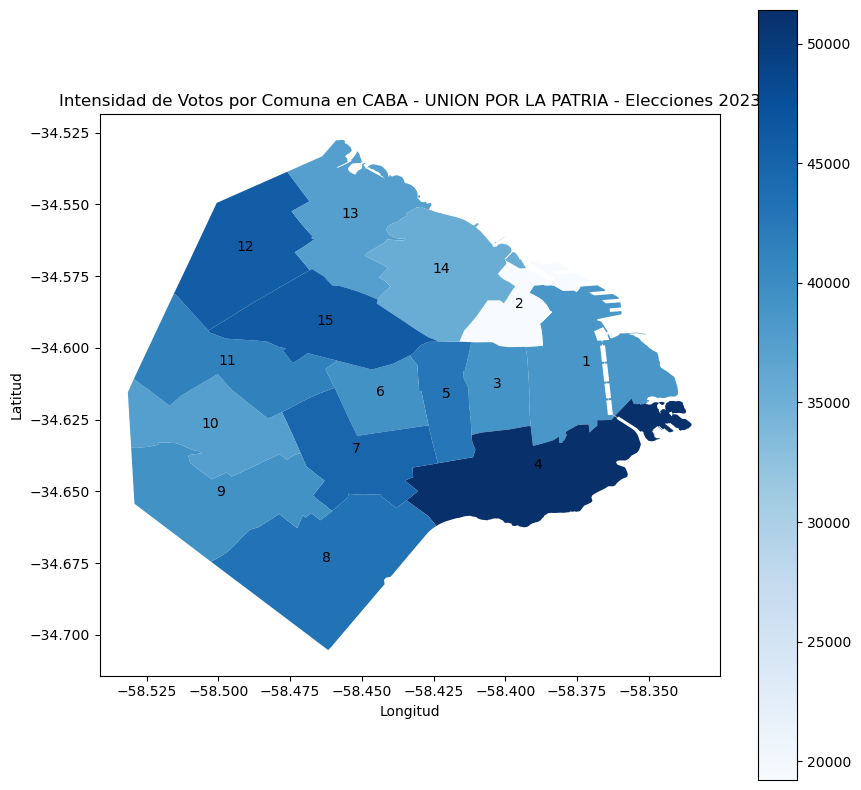

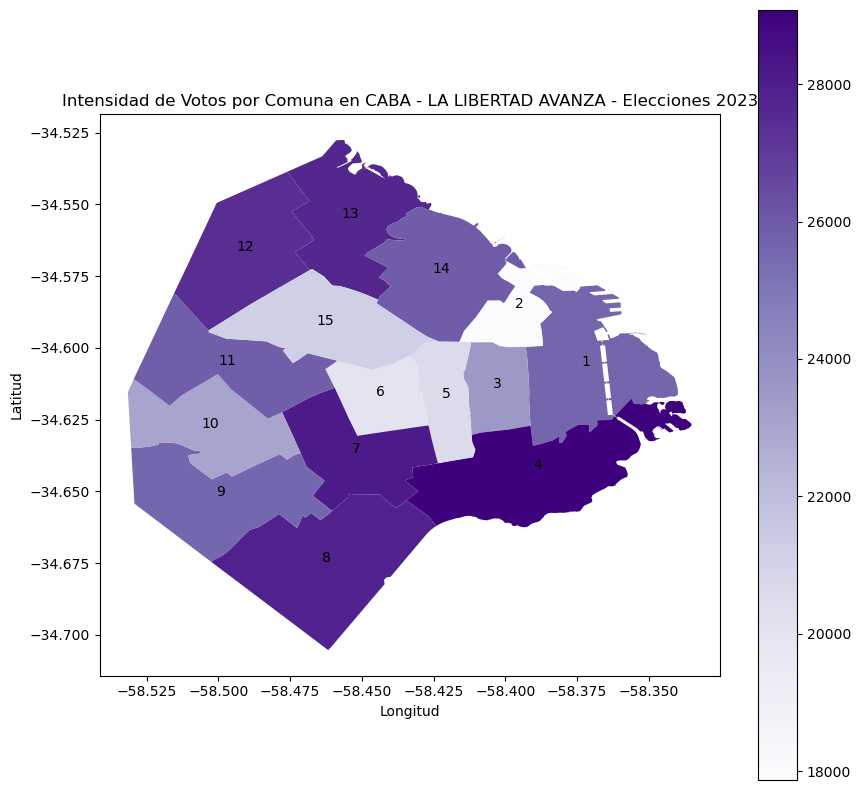

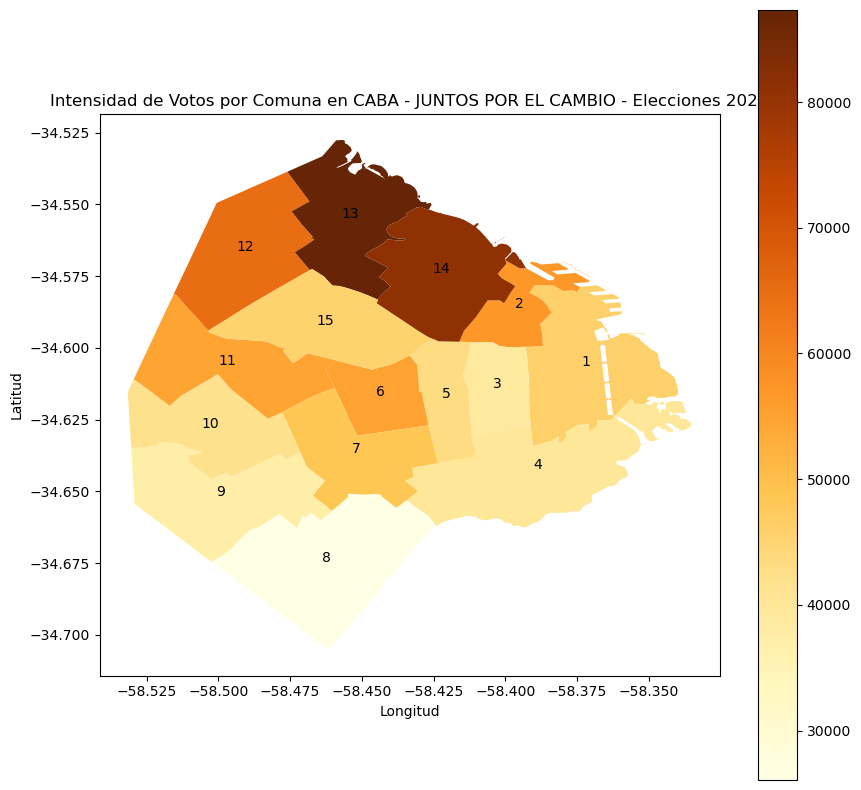

In [48]:
def plot_votos_por_comuna(df, gdf, partido_nombre, color):
    df_partido = df[df['agrupacion_nombre'] == partido_nombre]  # Filtrar por partido y agrupar los votos
    df_votos_por_comuna = df_partido.groupby('seccion_id')['votos_cantidad'].sum().reset_index()
    gdf_dissolved = gdf.dissolve(by='COMUNA') # Disolver el GeoDataFrame por comuna
    gdf_merged = gdf_dissolved.merge(df_votos_por_comuna, left_on=gdf_dissolved.index, right_on='seccion_id', how='left') # Realizar el merge
    fig, ax = plt.subplots(1, 1, figsize=(10, 10)) # Crear la figura
    gdf_merged.plot(column='votos_cantidad', ax=ax, legend=True, cmap=color)
    for _, row in gdf_merged.iterrows(): # Añadir anotaciones para los números de comuna
        plt.annotate(text=row['seccion_id'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                    horizontalalignment='center')
    plt.title(f'Intensidad de Votos por Comuna en CABA - {partido_nombre} - Elecciones 2023') # Establecer títulos y etiquetas
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.show()

plot_votos_por_comuna(df_resultadosCaba, gdf, "UNION POR LA PATRIA", 'Blues')
plot_votos_por_comuna(df_resultadosCaba, gdf, "LA LIBERTAD AVANZA", 'Purples')
plot_votos_por_comuna(df_resultadosCaba, gdf, "JUNTOS POR EL CAMBIO", 'YlOrBr')

### Ganadores por comuna

Los ganadores por comuna dentro de CABA se distribuyeron de la siguiente forma


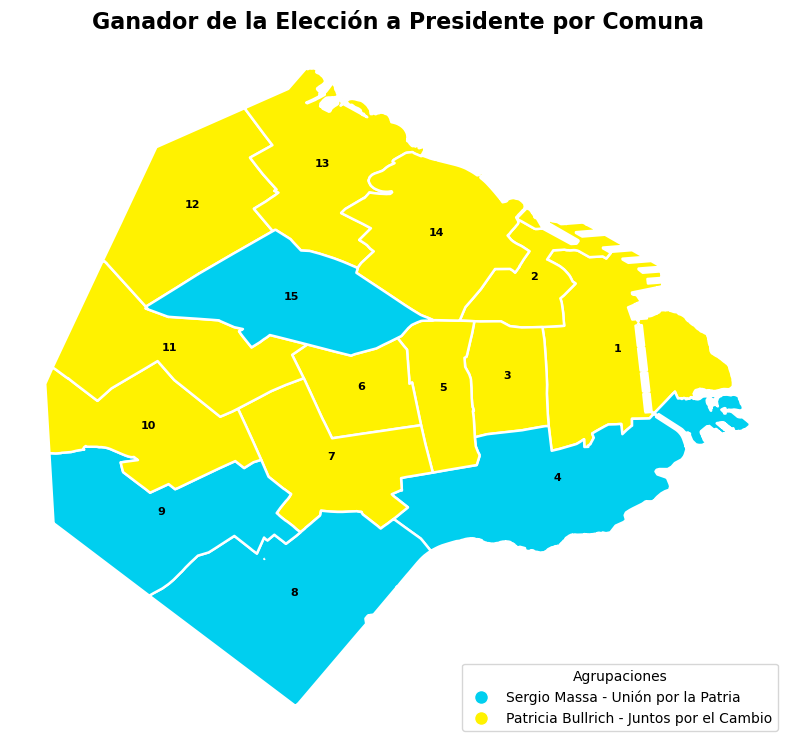

In [62]:
titulo = "Ganador de la Elección a Presidente por Comuna"
gdf_dissolved = gdf.dissolve(by='COMUNA')
gdf_merged = gdf_dissolved.merge(df_votos_maximos, left_on='COMUNA', right_on='seccion_id', how='left')
colores = {'JUNTOS POR EL CAMBIO': '#FFF200', 'UNION POR LA PATRIA': '#00CFEF'}
gdf_merged['color'] = gdf_merged['agrupacion_nombre'].map(colores)
fig, ax = plt.subplots(1, 1, figsize=(10, 10), facecolor='white')
gdf_merged.plot(ax=ax, color=gdf_merged['color'], edgecolor='white', linewidth=1.8)
for idx, row in gdf_merged.iterrows():
    plt.annotate(text=row['seccion_id'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=8, weight='bold', color='black')
plt.title(titulo, fontsize=16, weight='bold')
leyenda = {
    'Sergio Massa - Unión por la Patria': '#00CFEF',
    'Patricia Bullrich - Juntos por el Cambio': '#FFF200'
}

handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
           for label, color in leyenda.items()]

plt.legend(handles=handles, title='Agrupaciones', loc='lower right')
plt.axis('off')
plt.show()


La Libertad Avanza no ganó en ninguna comuna y Unión por la Patria solo en 4 de ellas (4,8,9 y 15)

## Datos de la población - CENSO 2010

Para trabajar con las bases del censo 2010 se requirió generar un diagrama de entidad relación (DER) que permitiera un mayor entendimiento de sus datos. Cabe aclarar que éstos son centralmente códigos cuyas etiquetas se encuentran en la carpeta "lebels".
El DER se desarrolló de la siguiente forma:

<img src="DER_Censo2010.png">

Con el fin de hacer un análisis electoral, es necesario conocer a la población de la Ciudad de Buenos Aires. Para eso, usamos las bases del Censo 2010. 
Nos planteamos las siguientes preguntas que nos ayudarán a responder cómo se compone el electorado porteño:

    1. ¿Cuáles son las comunas con mayor cantidad de hogares/personas con alguna necesidad básica insatisfecha (NBI)?
    2. Según nivel educativo, ¿Cómo se distribuye el % de personas con un nivel educativo mayor a secundario completo? (cods 6,7,8 var P09 Población) ¿Y con al menos secundario completo?
    

Primero, se calculó cuantas personas tienen al menos alguna necesidad básica insatisfecha según los criterios del CENSO 2010


Para eso, creamos un mapa para visualizar cuales son las comunas que tienen mayor porcentaje de personas con al menos una necesidad básica insatisfecha en sus hogares.


C:\Users\camiv\AppData\Local\Temp\ipykernel_20648\3593221735.py:6: FutureWarning: The default value of numeric_only in aggfunc='mean' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  gdf_dissolved = gdf.dissolve(by='COMUNA', aggfunc='mean')


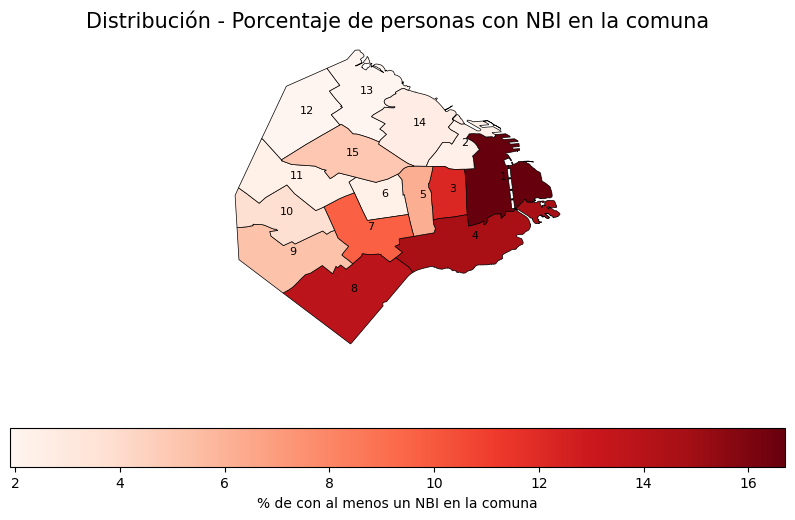

In [11]:
gdf = gpd.GeoDataFrame(df_caba, geometry=gpd.GeoSeries.from_wkt(df_caba['WKT']))
gdf['COMUNA'] = gdf['COMUNA'].astype(int)
CANT_personas_nbiP['LOCAL'] = CANT_personas_nbiP['LOCAL'].astype(int)
gdf = gdf.join(CANT_personas_nbiP.set_index('LOCAL'), on='COMUNA', how='left')
gdf['P_segun_poblacion_de_comuna'] = gdf['P_segun_poblacion_de_comuna'].round(1).astype(float)
gdf_dissolved = gdf.dissolve(by='COMUNA', aggfunc='mean')

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

gdf_dissolved.plot(column='P_segun_poblacion_de_comuna', ax=ax, legend=True,
                   legend_kwds={'label': "% de con al menos un NBI en la comuna",
                                'orientation': "horizontal"}, cmap='Reds', 
                   vmin=gdf['P_segun_poblacion_de_comuna'].min(), vmax=gdf['P_segun_poblacion_de_comuna'].max(),
                   edgecolor='black', linewidth=0.5)

for x, y, label in zip(gdf_dissolved.geometry.centroid.x, gdf_dissolved.geometry.centroid.y, gdf_dissolved.index):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, ha='center', va='center', color='black')


ax.set_title('Distribución - Porcentaje de personas con NBI en la comuna', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.show()

Realizamos un análisis de la población con un nivel educativo de al menos el secundario completo en 2010, por comuna. 

Luego, realizamos el mismo gráfico que aplicamos en el análisis de los casos con al menos un NBI, pero para el porcentaje de personas con el secundario o más del secundario completo


C:\Users\camiv\AppData\Local\Temp\ipykernel_20648\1861997432.py:6: FutureWarning: The default value of numeric_only in aggfunc='mean' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  gdf2_dissolved = gdf2.dissolve(by='COMUNA', aggfunc='mean')


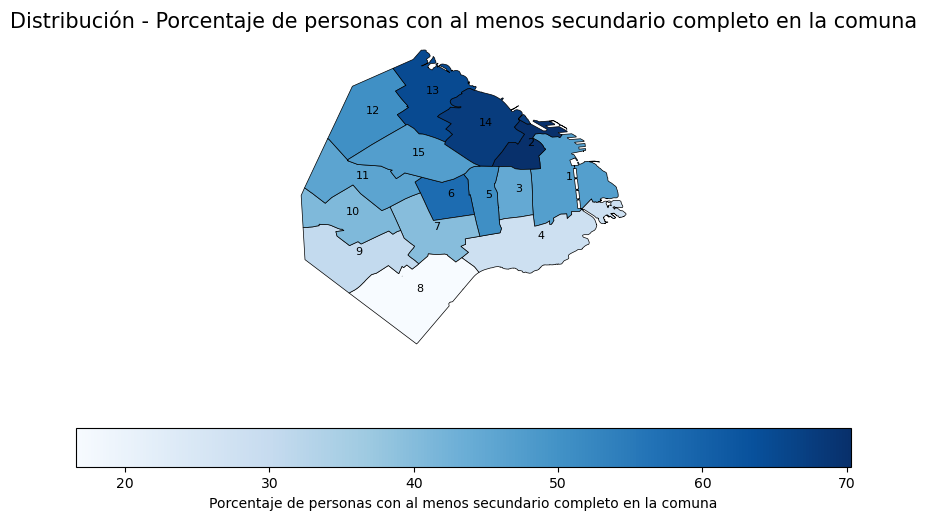

In [12]:
gdf2 = gpd.GeoDataFrame(df_caba, geometry=gpd.GeoSeries.from_wkt(df_caba['WKT']))
gdf2['COMUNA'] = gdf2['COMUNA'].astype(int)
CANT_personas_ES['LOCAL'] = CANT_personas_ES['LOCAL'].astype(int)
gdf2 = gdf2.join(CANT_personas_ES.set_index('LOCAL'), on='COMUNA', how='left')
gdf2['P_segun_poblacion_de_comuna'] = gdf2['P_segun_poblacion_de_comuna'].round(1).astype(float)
gdf2_dissolved = gdf2.dissolve(by='COMUNA', aggfunc='mean')
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf2_dissolved.plot(column='P_segun_poblacion_de_comuna', ax=ax, legend=True,
                   legend_kwds={'label': "Porcentaje de personas con al menos secundario completo en la comuna",
                                'orientation': "horizontal"}, cmap='Blues', 
                   vmin=gdf2['P_segun_poblacion_de_comuna'].min(), vmax=gdf2['P_segun_poblacion_de_comuna'].max(),
                   edgecolor='black', linewidth=0.5)
for x, y, label in zip(gdf2_dissolved.geometry.centroid.x, gdf2_dissolved.geometry.centroid.y, gdf2_dissolved.index):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, ha='center', va='center', color='black')

ax.set_title('Distribución - Porcentaje de personas con al menos secundario completo en la comuna', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.show()

## Vinculación entre tablas - Bases elecciones


### Cruces

#### Análisis de cómo se cruzan las NBI con los resultados electorales

C:\Users\camiv\AppData\Local\Temp\ipykernel_20648\1162435667.py:8: FutureWarning: The default value of numeric_only in aggfunc='mean' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  gdf3_dissolved = gdf3.dissolve(by='COMUNA', aggfunc='mean')


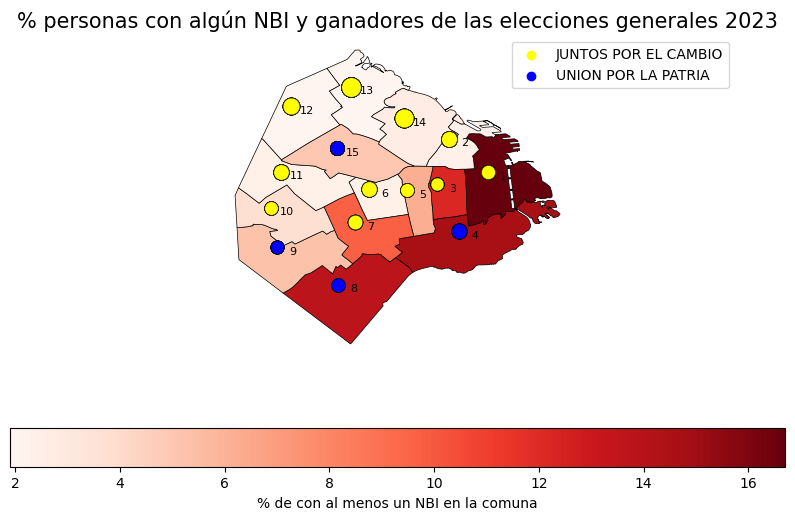

In [13]:
import seaborn as sns
gdf3 = gpd.GeoDataFrame(df_caba, geometry=gpd.GeoSeries.from_wkt(df_caba['WKT']))
gdf3['COMUNA'] = gdf3['COMUNA'].astype(int)
CANT_personas_nbiP['LOCAL'] = CANT_personas_nbiP['LOCAL'].astype(int)
gdf3 = gdf3.join(CANT_personas_nbiP.set_index('LOCAL'), on='COMUNA', how='left')
gdf3 = gdf3.join(df_ganadores_seccion.set_index('seccion_id'), on='COMUNA', how='left')
gdf3['P_segun_poblacion_de_comuna'] = gdf3['P_segun_poblacion_de_comuna'].round(1).astype(float)
gdf3_dissolved = gdf3.dissolve(by='COMUNA', aggfunc='mean')
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf3_dissolved.plot(column='P_segun_poblacion_de_comuna', ax=ax, legend=True,
                    legend_kwds={'label': "% de con al menos un NBI en la comuna",
                                 'orientation': "horizontal"}, cmap='Reds', 
                    vmin=gdf3['P_segun_poblacion_de_comuna'].min(), vmax=gdf3['P_segun_poblacion_de_comuna'].max(),
                    edgecolor='black', linewidth=0.5)
for x, y, label in zip(gdf3_dissolved.geometry.centroid.x, gdf2_dissolved.geometry.centroid.y, gdf3_dissolved.index):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, ha='center', va='center', color='black')
for idx, row in gdf3.iterrows():
    color = 'yellow' if row['agrupacion_nombre'] == 'JUNTOS POR EL CAMBIO' else 'blue'
    size = row['votos_cantidad'] / gdf3.groupby('agrupacion_nombre')['votos_cantidad'].transform('max').max() * 200
    centroid = gdf3_dissolved.geometry.centroid.loc[gdf3_dissolved.index == row['COMUNA']].squeeze()
    ax.scatter(centroid.x + (-0.007), centroid.y + 0.005, color=color, s=size, alpha=0.7, edgecolors='black', linewidth=0.5)
    
legend_labels = {'JUNTOS POR EL CAMBIO': 'yellow', 'UNION POR LA PATRIA': 'blue'}
for label, color in legend_labels.items():
    ax.scatter([], [], color=color, label=label)

ax.set_title('% personas con algún NBI y ganadores de las elecciones generales 2023', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
ax.legend(loc='upper left', bbox_to_anchor=(0.8, 1))
plt.show()


Para realizar una correlacion entre las variables analizadas, generamos una tabla nueva que cuenta con los datos de cantidad de votos por agrupación política, cantidad de personas con alguna NBI y cantidad de personas con estudios secundarios o superiores.

### Correlación entre partidos

Se hayó una correlación al observar los votos dentro de cada comuna para Unión por la Patria y la Libertad Avanza, entendiendo que el perfil comunal de cada una de las agrupaciones es similar entre sí.

In [65]:
df_filtrado = df_analisis[df_analisis['agrupacion_nombre'].isin(['UNION POR LA PATRIA', 'JUNTOS POR EL CAMBIO', 'LA LIBERTAD AVANZA'])]
df_agrupado = df_filtrado.groupby(['COMUNA', 'agrupacion_nombre'])['votos_cantidad'].sum().unstack()
correlacion_r2 = df_agrupado.corr()
correlacion_r2_seleccionada = correlacion_r2.loc['UNION POR LA PATRIA', ['JUNTOS POR EL CAMBIO', 'LA LIBERTAD AVANZA']]
print("Correlación (R2) entre UNION POR LA PATRIA y JUNTOS POR EL CAMBIO:")
print(correlacion_r2_seleccionada['JUNTOS POR EL CAMBIO'])
print("\nCorrelación (R2) entre UNION POR LA PATRIA y LA LIBERTAD AVANZA:")
print(correlacion_r2_seleccionada['LA LIBERTAD AVANZA'])
correlacion_jpc_libertad_avanza = correlacion_r2.loc['JUNTOS POR EL CAMBIO', 'LA LIBERTAD AVANZA']
print("\nCorrelación (R2) entre JUNTOS POR EL CAMBIO y LA LIBERTAD AVANZA:")
print(correlacion_jpc_libertad_avanza)

Correlación (R2) entre UNION POR LA PATRIA y JUNTOS POR EL CAMBIO:
-0.2970662988996023

Correlación (R2) entre UNION POR LA PATRIA y LA LIBERTAD AVANZA:
0.58148767644121

Correlación (R2) entre JUNTOS POR EL CAMBIO y LA LIBERTAD AVANZA:
0.06936610294770959


### Correlación Agrupaciones políticas y variables sociodemográficas

Luego, se realizó una correlación entre las variables extraidas del CENSO 2010 (Necesidades Básicas Insatisfechas y Población con al menos secundario completo)

In [14]:
df_resultados_caba_pivot = df_resultados_agrupado.pivot_table(index='seccion_id',columns='agrupacion_nombre',values='votos_cantidad')
df_total = df_resultados_caba_pivot.join(CANT_personas_nbiP.set_index('LOCAL')['conteo_ALGUNBI'], on='seccion_id', how='left')
df_total = df_total.join(CANT_personas_ES.set_index('LOCAL')['conteo_personas_secundario'], on='seccion_id', how='left')
df_total = df_total.reset_index()
print("Correlación Juntos por el Cambio y cantidad de personas con alguna NBI")
print("\n")
print('Correlación Pearson: ', df_total['JUNTOS POR EL CAMBIO'].corr(df_total['conteo_ALGUNBI'], method='pearson'))
print('Correlación spearman: ', df_total['JUNTOS POR EL CAMBIO'].corr(df_total['conteo_ALGUNBI'], method='spearman'))
print('Correlación kendall: ', df_total['JUNTOS POR EL CAMBIO'].corr(df_total['conteo_ALGUNBI'], method='kendall'))
print("\n")
print("Correlación Juntos por el Cambio y cantidad de personas con al menos estudios secundarios")
print("\n")
print('Correlación Pearson: ', df_total['JUNTOS POR EL CAMBIO'].corr(df_total['conteo_personas_secundario'], method='pearson'))
print('Correlación spearman: ', df_total['JUNTOS POR EL CAMBIO'].corr(df_total['conteo_personas_secundario'], method='spearman'))
print('Correlación kendall: ', df_total['JUNTOS POR EL CAMBIO'].corr(df_total['conteo_personas_secundario'], method='kendall'))
print("\n")
print("Correlación La Libertad Avanza y cantidad de personas con alguna NBI")
print("\n")
print('Correlación Pearson: ', df_total['LA LIBERTAD AVANZA'].corr(df_total['conteo_ALGUNBI'], method='pearson'))
print('Correlación spearman: ', df_total['LA LIBERTAD AVANZA'].corr(df_total['conteo_ALGUNBI'], method='spearman'))
print('Correlación kendall: ', df_total['LA LIBERTAD AVANZA'].corr(df_total['conteo_ALGUNBI'], method='kendall'))
print("\n")
print("Correlación La Libertad Avanza y cantidad de personas con al menos estudios secundarios")
print("\n")
print('Correlación Pearson: ', df_total['LA LIBERTAD AVANZA'].corr(df_total['conteo_personas_secundario'], method='pearson'))
print('Correlación spearman: ', df_total['LA LIBERTAD AVANZA'].corr(df_total['conteo_personas_secundario'], method='spearman'))
print('Correlación kendall: ', df_total['LA LIBERTAD AVANZA'].corr(df_total['conteo_personas_secundario'], method='kendall'))
print("Correlación Unión por la Patria y cantidad de personas con alguna NBI")
print("\n")
print('Correlación Pearson: ', df_total['UNION POR LA PATRIA'].corr(df_total['conteo_ALGUNBI'], method='pearson'))
print('Correlación spearman: ', df_total['UNION POR LA PATRIA'].corr(df_total['conteo_ALGUNBI'], method='spearman'))
print('Correlación kendall: ', df_total['UNION POR LA PATRIA'].corr(df_total['conteo_ALGUNBI'], method='kendall'))
print("\n")
print("\n")
print("Correlación Unión por la Patria y cantidad de personas con al menos estudios secundarios")
print("\n")
print('Correlación Pearson: ', df_total['UNION POR LA PATRIA'].corr(df_total['conteo_personas_secundario'], method='pearson'))
print('Correlación spearman: ', df_total['UNION POR LA PATRIA'].corr(df_total['conteo_personas_secundario'], method='spearman'))
print('Correlación kendall: ', df_total['UNION POR LA PATRIA'].corr(df_total['conteo_personas_secundario'], method='kendall'))

Correlación Juntos por el Cambio y cantidad de personas con alguna NBI


Correlación Pearson:  -0.555537111489104
Correlación spearman:  -0.7035714285714285
Correlación kendall:  -0.48571428571428577


Correlación Juntos por el Cambio y cantidad de personas con al menos estudios secundarios


Correlación Pearson:  0.9268965464296802
Correlación spearman:  0.907142857142857
Correlación kendall:  0.7714285714285715


Correlación La Libertad Avanza y cantidad de personas con alguna NBI


Correlación Pearson:  0.4330818983446092
Correlación spearman:  0.3714285714285714
Correlación kendall:  0.23809523809523814


Correlación La Libertad Avanza y cantidad de personas con al menos estudios secundarios


Correlación Pearson:  -0.18221367522887047
Correlación spearman:  -0.2821428571428571
Correlación kendall:  -0.21904761904761905
Correlación Unión por la Patria y cantidad de personas con alguna NBI


Correlación Pearson:  0.4014210227457864
Correlación spearman:  0.3714285714285714
Correlaci

### Teniendo la participación total, ahora revisamos la participación por comuna

#### Correlacion participación y votos


Luego, tomamos el porcentaje de participación electoral por comuna, y lo vinculamos al porcentaje alcanzado por partido en cada una de ellas. De esta forma analizamos que tan vinculada está la participación a la posibilidad de alcanzar mayoría de cada agrupación

In [77]:
tabla_votos_porcentuales = pd.DataFrame(df_agrupado_porcentual).reset_index()
tabla_votos_porcentuales
df_total2 = pd.merge(df_total, df_resultadosCaba2, left_on='seccion_id', right_on='COMUNA', how='left')
df_total2 = pd.merge(df_total2, tabla_votos_porcentuales, left_on='seccion_id', right_on='seccion_id', how='left')
df_total2

,seccion_id,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,HACEMOS POR NUESTRO PAIS,JUNTOS POR EL CAMBIO_x,LA LIBERTAD AVANZA_x,UNION POR LA PATRIA_x,conteo_ALGUNBI,conteo_personas_secundario,COMUNA,Votantes totales,Votos emitidos,Participacion_por_comuna,JUNTOS POR EL CAMBIO_y,LA LIBERTAD AVANZA_y,UNION POR LA PATRIA_y
0,1,3981,3230,45975,25657,38645,34311,79402,1,191557.0,121250,63.3,41.69,23.27,35.04
1,2,1912,2250,57022,17875,19225,3693,96279,2,152142.0,100235,65.9,60.58,18.99,20.43
2,3,4571,3362,39075,23562,38993,22897,68846,3,168193.0,112465,66.9,38.45,23.18,38.37
3,4,5586,4211,39963,29077,51401,32157,45852,4,174922.0,134521,76.9,33.18,24.14,42.68
4,5,4814,3675,43259,20595,42504,11079,74894,5,152252.0,117662,77.3,40.67,19.36,39.96
5,6,4208,3698,54873,20043,39230,4219,84628,6,151400.0,124701,82.4,48.07,17.56,34.37
6,7,4863,4193,48420,28137,44622,21350,68032,7,169326.0,133889,79.1,39.96,23.22,36.82
7,8,4285,3238,26068,27845,43136,25844,21764,8,133107.0,109192,82.0,26.86,28.69,44.45
8,9,4578,4047,37413,25544,39233,8504,38421,9,145237.0,114065,78.5,36.61,25.00,38.39
9,10,4719,4164,41986,23062,37457,6248,54148,10,144652.0,114417,79.1,40.96,22.50,36.54


In [76]:
def calcular_correlaciones(df_total2, columna_votos='Votos emitidos'):
    # Filtrar solo las columnas numéricas para calcular correlaciones
    columnas = ['JUNTOS POR EL CAMBIO_y', 'LA LIBERTAD AVANZA_y', 'UNION POR LA PATRIA_y']
    
    # Iterar sobre las columnas y calcular la correlación con 'cantidad de votos'
    for columna in columnas:
        correlacion = df_total2[columna].corr(df_total2[columna_votos], method='pearson')
        print(f"La correlación entre {columna} y {columna_votos} es: {correlacion.round(2)}")

calcular_correlaciones(df_total2, 'Participacion_por_comuna')


La correlación entre JUNTOS POR EL CAMBIO_y y Participacion_por_comuna es: -0.19
La correlación entre LA LIBERTAD AVANZA_y y Participacion_por_comuna es: -0.02
La correlación entre UNION POR LA PATRIA_y y Participacion_por_comuna es: 0.26


Como resultado, evidenciamos que existe una correlación positiva no significativa entre la participación electoral y el porcentaje de votos alcanzados por Unión por la Patria

## Insights de los resultados

### Escenario electoral 2023 - CABA

Durante las elecciones generales de CABA en 2023 se registró una concurrencia del 76.5%, abarcando la totalidad del padrón a 2.497.035 personas.
Las comunas con mayor participación electoral fueron las Comunas 12, 6 y 8, y las de menor participación las Comunas 1,2 y 3

Ubicandonos como asesores de UxP de cara al balotaje.

    LLA y UxP comparten el perfil de votantes, y JxC tiene un perfil de votantes contrario a UxP.

    JxC correlaciona con nivel de estudios alto y con bajo NBI

    UxP y LLA correlacionan con nivel bajo de estudios y alto de NBI 

    Los votos a recolectar son los de JxC, que tienen un perfil diferente a UxP y más cercano a LLA que a UxP

    Cuando correlacionamos los partidos entre sí, vemos que UxP tiene una alta correlación con LLA, pero una correlación negativa con JxC.

    La correlación entre LLA y JxC es nula, por lo que ellos estarán en ventaja.

    La estrategia a seguir desde UxP es movilizar a los votantes que aún no fueron a votar. Vemos que alta participación correlaciona levemente con una mejor performance para UxP. Movilizar a votantes que no fueron a votar en las generales debe ser la estrategia para aumentar los votos para UxP.

    Para los votantes de JxC y de LLA la alternativa es desmovilizar el voto. Ya que JxC y UxP tienen correlación negativa, lo mejor es oponerlos a LLA y no gastar recursos intentando que voten a UxP.


In [18]:
df_resultados_agrupado2.sort_values('votos_cantidad', ascending=False)

NameError: name 'df_resultados_agrupado2' is not defined